# DATA 202 Homework 1 (Part 2: Practice with Data)
Catherine DeJager

## Board Game Geek (BGG) Dataset

### 2.1: Acquire Data

**I searched Google for datasets about board games and found this dataset. The url is https://www.kaggle.com/gabrio/board-games-dataset. I think I had to make a Kaggle account to get the dataset. I downloaded database.sqlite and got a 51.3 MB Zip file containing a 147.1 MB sqlite database. The website says there should be about 94,000 records.**

How was it collected? By whom? Under what circumstances?
* The data was collected by Kaggle user Gabriele Baldassarre by scraping data from the website https://https://boardgamegeek.com/ (which I think mainly gets its data from user submissions? I'm not sure.) The webpage on Kaggle has links to the scripts used to scrape the data.

What processing (filtering, transformation, etc.) was done to get it in the form you now have?
* The Kaggle webpage doesn't say, but I could follow the aforementioned link and look at the R scripts to find out.

What different people or organizations did it go through?
* From the website to the dataset, just this one guy as far as I can tell. As far as the whole ecology of the website, I'm not sure. That matters because it determines what kind of games are over-represented or under-represented and how data is collected and posted.

License: What permissions do you have to use it? Is there anything the authors explicitly allow or disallow you to do with it?
* No license is listed, but the description says "The database includes data for performing Marketing Research and exploratory analysis of various kind on Board Games.", so that use is explicitly allowed.

### 2.2: Explore Data

In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib as plt
import numpy as np

In [2]:
conn = sqlite3.connect("database.sqlite")  # connect to database
df = pd.read_sql_query("SELECT * FROM BoardGames", conn)
df.head()

row_names game.id  game.type  \
0         1       1  boardgame   
1         2       2  boardgame   
2         3       3  boardgame   
3         4       4  boardgame   
4         5       5  boardgame   

                                 details.description  \
0  Die Macher is a game about seven sequential po...   
1  Dragonmaster is a trick-taking card game based...   
2  Part of the Knizia tile-laying trilogy, Samura...   
3  When you see the triangular box and the luxuri...   
4  In Acquire, each player strategically invests ...   

                                  details.image  details.maxplayers  \
0   //cf.geekdo-images.com/images/pic159509.jpg                 5.0   
1   //cf.geekdo-images.com/images/pic184174.jpg                 4.0   
2  //cf.geekdo-images.com/images/pic3211873.jpg                 4.0   
3   //cf.geekdo-images.com/images/pic285299.jpg                 4.0   
4   //cf.geekdo-images.com/images/pic342163.jpg                 6.0   

   details.maxplaytime  details.minage  details.minplayers  \
0                240.0            14.0                 3.0   
1                 30.0            12.0                 3.0   
2                 60.0            10.0                 2.0   
3                 60.0            12.0                 2.0   
4                 90.0            12.0                 3.0   

   details.minplaytime             ...              \
0                240.0             ...               
1                 30.0             ...               
2                 30.0             ...               
3                 60.0             ...               
4                 90.0             ...               

  stats.family.arcade.bayesaverage  stats.family.arcade.pos  \
0                              NaN                      NaN   
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              NaN                      NaN   

  stats.family.atarist.bayesaverage  stats.family.atarist.pos  \
0                               NaN                       NaN   
1                               NaN                       NaN   
2                               NaN                       NaN   
3                               NaN                       NaN   
4                               NaN                       NaN   

  stats.family.commodore64.bayesaverage stats.family.commodore64.pos  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

  stats.subtype.rpgitem.bayesaverage stats.subtype.rpgitem.pos  \
0                                NaN                       NaN   
1                                NaN                       NaN   
2                                NaN                       NaN   
3                                NaN                       NaN   
4                                NaN                       NaN   

  stats.subtype.videogame.bayesaverage stats.subtype.videogame.pos  
0                                  NaN                         NaN  
1                                  NaN                         NaN  
2                                  NaN                         NaN  
3                                  NaN                         NaN  
4                                  NaN                         NaN  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 81 columns):
row_names                                   90400 non-null object
game.id                                     90400 non-null object
game.type                                   90400 non-null object
details.description                         90400 non-null object
details.image                               83508 non-null object
details.maxplayers                          90397 non-null float64
details.maxplaytime                         90397 non-null float64
details.minage                              90397 non-null float64
details.minplayers                          90397 non-null float64
details.minplaytime                         90397 non-null float64
details.name                                90400 non-null object
details.playingtime                         90397 non-null float64
details.thumbnail                           83508 non-null object
details.yearpublished      

**There are 90400 rows and 81 columns, though not all columns have values for every row. (Looks like the website may be a typo then; there are 90400 rows instead of 94000 rows.)**

In [4]:
clean_df = df.dropna(subset=['details.playingtime'])
clean_df = clean_df[clean_df['details.playingtime'] != 0]

**I had to remove outliers to make the data plottable. I looked at the games with abnormally high playing times, and it looks like they are roleplaying games (especially wargames) to be played over the course of several months**

In [52]:
no_outliers = clean_df[clean_df['details.playingtime'] < clean_df['details.playingtime'].quantile(0.95)]
no_outliers.head()


row_names game.id  game.type  \
1         2       2  boardgame   
2         3       3  boardgame   
3         4       4  boardgame   
4         5       5  boardgame   
6         7       7  boardgame   

                                 details.description  \
1  Dragonmaster is a trick-taking card game based...   
2  Part of the Knizia tile-laying trilogy, Samura...   
3  When you see the triangular box and the luxuri...   
4  In Acquire, each player strategically invests ...   
6  In Cathedral, each player has a set of pieces ...   

                                  details.image  details.maxplayers  \
1   //cf.geekdo-images.com/images/pic184174.jpg                 4.0   
2  //cf.geekdo-images.com/images/pic3211873.jpg                 4.0   
3   //cf.geekdo-images.com/images/pic285299.jpg                 4.0   
4   //cf.geekdo-images.com/images/pic342163.jpg                 6.0   
6   //cf.geekdo-images.com/images/pic181642.jpg                 2.0   

   details.maxplaytime  details.minage  details.minplayers  \
1                 30.0            12.0                 3.0   
2                 60.0            10.0                 2.0   
3                 60.0            12.0                 2.0   
4                 90.0            12.0                 3.0   
6                 20.0             8.0                 2.0   

   details.minplaytime             ...              \
1                 30.0             ...               
2                 30.0             ...               
3                 60.0             ...               
4                 90.0             ...               
6                 20.0             ...               

  stats.family.arcade.bayesaverage  stats.family.arcade.pos  \
1                              NaN                      NaN   
2                              NaN                      NaN   
3                              NaN                      NaN   
4                              NaN                      NaN   
6                              NaN                      NaN   

  stats.family.atarist.bayesaverage  stats.family.atarist.pos  \
1                               NaN                       NaN   
2                               NaN                       NaN   
3                               NaN                       NaN   
4                               NaN                       NaN   
6                               NaN                       NaN   

  stats.family.commodore64.bayesaverage stats.family.commodore64.pos  \
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
6                                   NaN                          NaN   

  stats.subtype.rpgitem.bayesaverage stats.subtype.rpgitem.pos  \
1                                NaN                       NaN   
2                                NaN                       NaN   
3                                NaN                       NaN   
4                                NaN                       NaN   
6                                NaN                       NaN   

  stats.subtype.videogame.bayesaverage stats.subtype.videogame.pos  
1                                  NaN                         NaN  
2                                  NaN                         NaN  
3                                  NaN                         NaN  
4                                  NaN                         NaN  
6                                  NaN                         NaN  

[5 rows x 81 columns]

In [53]:
print(no_outliers[['details.playingtime']].mode())
no_outliers[['details.playingtime']].describe()

   details.playingtime
0                 30.0


details.playingtime
count         63663.000000
mean             46.513077
std              33.200970
min               1.000000
25%              20.000000
50%              30.000000
75%              60.000000
max             175.000000

**(Analysis of the 95% most common playing times.) Playing times range from 1 minute to  175 minutes. 50% of games have an estimated playing time of 30 minutes or less. Only 25% of games of Board Game Geek have an estimated playing time of over 1 hour. The most common estimated playing time is 30 minutes.**

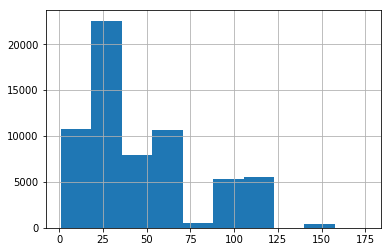

In [8]:
no_outliers['details.playingtime'].hist()

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


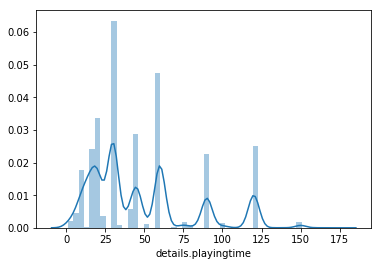

In [9]:
sns.distplot(no_outliers['details.playingtime'])

**This is a multimodal distribution. There are short games (usually around 30 minutes), longer games (closer to 60 minutes), and even longer games (approximately 90-120 minutes). I know the unit of measurement is minutes because I have used Board Game Geek and also because this is the unit of measurement that makes sense (there are not a lot of games that take 30 hours or 30 seconds, for example.)**

In [10]:
mechanic_df = df.dropna(subset=['attributes.boardgamemechanic'])

In [11]:
mechanic_df['attributes.boardgamemechanic']

0        Area Control / Area Influence,Auction/Bidding,...
1                                             Trick-taking
2        Area Control / Area Influence,Hand Management,...
3        Action Point Allowance System,Area Control / A...
4             Hand Management,Stock Holding,Tile Placement
5                                             Dice Rolling
6        Area Enclosure,Pattern Building,Pattern Recogn...
7                                            Modular Board
8             Area Control / Area Influence,Tile Placement
9        Card Drafting,Hand Management,Point to Point M...
10                  Hand Management,Set Collection,Trading
11          Auction/Bidding,Press Your Luck,Set Collection
12       Dice Rolling,Hand Management,Modular Board,Rou...
13       Roll / Spin and Move,Set Collection,Simultaneo...
14                  Hand Management,Variable Player Powers
15                                         Auction/Bidding
16                            Dice Rolling,Press Your Lu

In [12]:
mechanic_df['attributes.boardgamemechanic'].describe()

count                    75163
unique                    9709
top       Roll / Spin and Move
freq                      6833
Name: attributes.boardgamemechanic, dtype: object

In [13]:
mechanic_df['attributes.boardgamemechanic'].unique()  # get the unique values

array(['Area Control / Area Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection',
       'Trick-taking',
       'Area Control / Area Influence,Hand Management,Set Collection,Tile Placement',
       ...,
       'Action Point Allowance System,Area Control / Area Influence,Dice Rolling,Player Elimination',
       'Chit-Pull System,Co-operative Play,Deck / Pool Building',
       'Dice Rolling,Role Playing,Variable Player Powers,Voting'],
      dtype=object)

**There are many different types of board game mechanics here. These are keywords that describe certain key elements of gameplay. For example, "Dice Rolling" means that players must roll dice. There are definitely some values that are similar things written down differently - in particular, some mechanics entail others. For example, if a game involves "Deck / Pool Building", there's a good chance it also involves "Hand Management" (if you are building a deck of cards, you probably have to manage them in your hand). Also, this column is not a single mechanic value but rather a list of mechanics. As such, there are a lot of similar but different values. (e.g., ["Dice Rolling, Role Playing"] is distinct from ["Dice Rolling"]**

Easy questions:
  1. What is the average estimated playing time of the games on Board Game Geek?
  2. What combinations of mechanics are common for the games on Board Game Geek?

Hard questions:
  1. What individual mechanics are the most common for the games on Board Game Geek? (Would need to split up the lists in the boardgamemechanic column)
  2. What pairs of mechanics are common for the games on Board Game Geek (see hard question 1)

Impossible questions:
  1. How much do board games on Board Game Geek cost? (No data on this)
  2. What kind of people play board games? (I don't see any demographic information)

**This dataset probably suffers from underrepresentation of Indie games - games that are less widely known may not be on Board Game Geek or may not have as much information about them on Board Game Geek. Some stats (e.g., every column that starts with "polls") are based on user-submitted information. People are unreliable. For example, most people will only submit info about a game if they really like it or really hate it, so that may skew columns related to ratings or comments towards extreme values.**

## OSMI Mental Health in Tech Survey

### 2.1: Acquire Data

**I searched Kaggle for "survey" and found this dataset. The url is https://www.kaggle.com/osmi/mental-health-in-tech-2016. I think I had to make a Kaggle account to get the dataset. I downloaded mental-heath-in-tech-2016_20161114.csv and got a 169 KB Zip file containing a 1.1 MB CSV file. The website says there should be over 1400 records.**

How was it collected? By whom? Under what circumstances?
* The data was collected by Open Sourcing Mental Illness (OSMI), which "is a non-profit, 501c3 corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities." in the form of a 2016 survey (which is reportedly "ongoing", but the dataset hasn't been updated since 3 years ago). I don't know how the survey was sent out (i.e., how people found the survey.)

What processing (filtering, transformation, etc.) was done to get it in the form you now have?
* The Kaggle webpage doesn't say. Probably the survey was set up such that the results were automatically put into a CSV, or something close to that (for example, you can link a form on Google Forms such that it updates a sheet on Google Sheets, which could then be downloaded into a CSV).

What different people or organizations did it go through?
* Just OSMI I think.

License: What permissions do you have to use it? Is there anything the authors explicitly allow or disallow you to do with it?
* License: Creative Commons Attribution-ShareAlike 4.0 International (CC BY-SA 4.0). You are free to share and adapt (even commercially), provided you provide attribution (give appropriate credit, provide a link to the license, and indicate if changes were made) and ShareAlike (must use the same license). You cannot apply legal or technical measures to prohibit others from doing anything that the license allows. 

The description says "We are interested in gauging how mental health is viewed within the tech/IT workplace, and the prevalence of certain mental health disorders within the tech industry. The Open Sourcing Mental Illness team of volunteers will use this data to drive our work in raising awareness and improving conditions for those with mental health disorders in the IT workplace.", so the dataset is intended for OSMI's use but provided for other people who want to use it.

### 2.2: Explore Data

In [28]:
mh = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")
mh.head()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [15]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
Are you self-employed?                                                                                                                                                              1433 non-null int64
How many employees does your company or organization have?                                                                                                                          1146 non-null object
Is your employer primarily a tech company/organization?                                                                                                                             1146 non-null float64
Is your primary role within your company related to tech/IT?                                                                                                                        263 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?        

**This dataset has 1433 rows and 63 columns. Not every question was answered by every participant, so we can conclude that most, if not all, questions were optional.**

In [16]:
mh["Do you currently have a mental health disorder?"].value_counts()

Yes      575
No       531
Maybe    327
Name: Do you currently have a mental health disorder?, dtype: int64

In [17]:
print("Yes: %f, No: %f, Maybe: %f" %(575/1433, 531/1433, 327/1433))

Yes: 0.401256, No: 0.370551, Maybe: 0.228193


**This is a little higher than I was expecting, especially, the percentage of "Maybe". Although as I think about it, the number of "Maybe"s makes sense because people might think they may have a disorder but not have an official diagnosis, and those people would probably choose "Maybe".**

In [18]:
mh["If yes, what condition(s) have you been diagnosed with?"].value_counts(normalize=True)

Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                0.205986
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                    0.179577
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                  0.082746
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder                                                

**Looks like this was a "check all that apply" kind of question. Does pandas have anything built in for handling this configuration of categorical variabes? It's a fairly common occurrence. Anyway, it looks like Anxiety Disorders are the most common, but Mood Disorders and ADHD are also common.**

In [19]:
d_anxiety = mh["If yes, what condition(s) have you been diagnosed with?"].str.contains('Anxiety Disorder', regex=False).sum()
d_mood = mh["If yes, what condition(s) have you been diagnosed with?"].str.contains('Mood Disorder', regex=False).sum()
d_adhd = mh["If yes, what condition(s) have you been diagnosed with?"].str.contains('Attention Deficit Hyperactivity Disorder', regex=False).sum()
d_ocd = mh["If yes, what condition(s) have you been diagnosed with?"].str.contains('Obsessive-Compulsive Disorder', regex=False).sum()
print("anxiety: {} ({:.2f}), mood: {} ({:.2f}), adhd: {} ({:.2f}), ocd: {} ({:.2f})".format(d_anxiety, d_anxiety/1433, d_mood, d_mood/1433, d_adhd, d_adhd/1433, d_ocd, d_ocd/1433))

anxiety: 345 (0.24), mood: 412 (0.29), adhd: 121 (0.08), ocd: 45 (0.03)


**So here we can see that my previous hypothesis was confirmed. I still wonder if there's a nicer way to do this sort of computation.**

In [20]:
m_anxiety = mh["If maybe, what condition(s) do you believe you have?"].str.contains('Anxiety Disorder', regex=False).sum()
m_mood = mh["If maybe, what condition(s) do you believe you have?"].str.contains('Mood Disorder', regex=False).sum()
m_adhd = mh["If maybe, what condition(s) do you believe you have?"].str.contains('Attention Deficit Hyperactivity Disorder', regex=False).sum()
m_ocd = mh["If maybe, what condition(s) do you believe you have?"].str.contains('Obsessive-Compulsive Disorder', regex=False).sum()
print("anxiety: {} ({:.2f}), mood: {} ({:.2f}), adhd: {} ({:.2f}), ocd: {} ({:.2f})".format(m_anxiety, m_anxiety/1433, m_mood, m_mood/1433, m_adhd, m_adhd/1433, m_ocd, m_ocd/1433))

anxiety: 192 (0.13), mood: 219 (0.15), adhd: 58 (0.04), ocd: 30 (0.02)


In [21]:
ocd = d_ocd + m_ocd
print(m_ocd/ocd)

0.4


**Interesting that there are almost as many self-diagnosed cases of OCD as diagnosed cases of OCD. My guess would be people aren't getting treated (and thus diagnosed) due to stigma or because the disorder is not severe.**

Easy questions:

1. How do tech employers handle mental health issues? (e.g., healthcare)
2. What disorders are most common among tech employees with mental health issues?

Hard questions:
1. For people who said they would bring up a mental health issue with a potential employer in an interview, what reasons do they give for doing so? (I decided to answer this question, see below)
2. Do employees who work remotely have higher or lower incidence of mental health issues than employees who don't work remotely?

Impossible questions:
1. What ethnicities are more likely to have mental health issues? (race is not reported in this survey)
2. What kind of mental health treatment do tech employees recieve? (e.g., what kind of medication and/or therapy)

In [46]:
mh_interview = mh[["Would you bring up a mental health issue with a potential employer in an interview?", "Why or why not?.1", "If yes, what condition(s) have you been diagnosed with?"]]
mh_interview = mh_interview.dropna(how='all')
mh_interview["Would you bring up a mental health issue with a potential employer in an interview?"].value_counts()

No       883
Maybe    438
Yes      112
Name: Would you bring up a mental health issue with a potential employer in an interview?, dtype: int64

In [47]:
mh_interview_yes = mh_interview[mh_interview["Would you bring up a mental health issue with a potential employer in an interview?"] == "Yes"]
mh_interview_yes["Why or why not?.1"].unique()

array(['Stigma, mainly. ',
       'I want to gauge their ability to support, understand and empathize with my situation.',
       'Same reason as above.',
       "It's no different from a physical health issue. If it can potentially affect my performance then I should be clear.",
       "Same answer as for physical health issues, though admittedly I'm a little slower to bring up mental health concerns due to stigma fears.",
       'Because my employer needs to support me in order to get the best work possible from me',
       'Would want to know if management support is going to work.', nan,
       'Again: honesty.',
       'I would bring up any issue that would affect my performance of that jobs duties ',
       'Same response as the physical one.',
       'If it was relevant to the position. ',
       'Again, if relevant to the work hours or similar.',
       "I am to the point in my career that if cannot be honest with my employer, then I don't want to work for them.",
       "I suf

**As you can see, I decided to answer what I called a "hard" question. It looks like the responses fit into a few categories: honesty, possibility to recieve accomodations (time off, etc.), because it affects their work (i.e., it is relevant to their job), and to weed out employers who are biased against people with mental disorders.**

**With no race information, it's impossible to tell whether certain races are under-represented. This dataset may under-represent people with mental illness because they either aren't willing to disclose that information or don't know they have mental illness. Alternately, it's possible people with mental illness are over-represented because they are more likely to fill out a survey like this. Maybe these two effects cancel out? It's hard to tell.**

## Compare and Contrast

Distribution (ease of finding/acquisition, file type, etc.)
* BGG required connecting to sqlite database, but it wasn't too bad. OSMI was very easy.

Documentation (provenance information, licensing clarity, ease of understanding what the columns mean)
* OSMI definitely wins here. It had a license, and because the columns were questions, it was easy to tell what each column meant. However, the BGG dataset would likely mostly be explored by people who know BGG and thus don't need as much explanation.

Size (file size, record count, etc.)
* BGG was much bigger. A lot more board games listed online than tech people answering a 2016 survey. No surprise there.

How the data is represented (column count, consistency, etc.)
* BGG was a little easier to work with overall because the column names were shorter and the column values were nice types to work with (from what I saw). However, it did have the downside that it was not always obvious what sort of data type I could expect to see in a given column. The OSMI had things like questions that seemed like they would be boolean but were actually yes-no-maybe-na, and it had many n/a values because some people didn't answer some questions. Those things are all probably typical of survey data. I wonder if there are special tools or standards for working with survey data?

Representativeness / bias
* Hard to tell. BGG might have been more representative. But with both, it was kind of hard to tell how representative/biased the datasets were, because the information I would use to make that judgement wasn't posted in an obvious place.

## For fun

Favorite first day of class this semester: STAT 245 with Professor De Ruiter. We had different stations of things to do, including a station where we came up with questions for her to ask the class in a get-to-know you survey, brainstorming ideas for Data Science events, and a "field trip" to her office where we put stickers on a map to show where we were from and we got to take some of the snacks she stores in her office for students.

## Reflection

This assignment took me several hours. I sort of lost track of time, so I can't be more specific than that. The time to do the bare minimum was probably about 1.5 hours, but I had fun doing more exploration and analysis. I spent a fair bit of time searching for datasets (I was really picky), but I probably spent the most time analyzing the datasets I chose.

Sidenote: I chose to look at the mental health dataset because I have been diagnosed with OCD (freshman year at Calvin, it was a rough time). It's pretty well managed now so I don't notice it much except it does tend to come out in research - often I'm like "must collect all possible data and analyze all possibilities thoroughly" so I have to pay attention to when I've gone past the point of "interesting and/or useful" to "mindless drone compulsively trying to attain all possible information". While this assignment did take longer than needed, I was still well within the "interesting and/or useful" zone (except maybe for searching for datasets, but then I finally found some good ones and gave up searching), thankfully. :)